# Impfraten bei Kindern

Gruppe: Léa Grandchamp, Brigit Marxe, Enea Solca

Fragen

- Wie haben sich die Durchimpfungsraten für zentrale Kinderimpfungen im Beobachtungszeitraum des Datensatzes entwickelt, und in welchen ausgewählten Ländern oder Weltregionen zeigen sich besonders starke Fortschritte bzw. Rückschritte?
- Gibt es systematische Unterschiede in der Höhe der Durchimpfungsraten zwischen verschiedenen Kinderimpfungen, und haben sich diese Unterschiede im Zeitverlauf vergrössert oder verkleinert?
- Lässt sich ein Zusammenhang zwischen den Durchimpfungsraten und der Kindersterblichkeit erstellen?

Quellen:
- https://ourworldindata.org/grapher/global-vaccination-coverage
- https://ourworldindata.org/child-mortality

## 1. Daten beschaffen und laden

In [103]:
import pandas as pd
from matplotlib import pyplot as plt

In [104]:
df1 = pd.read_csv("global-vaccination-coverage.csv", skiprows=1, names=["Entity","Code","Year","Share of one-year-olds who have had three doses of the hepatitis B vaccine","Share of one-year-olds vaccinated against Haemophilus influenzae type b","Share of one-year-olds who have had the one dose of the inactivated polio vaccine","Share of one-year-olds who have had one dose of the measles vaccine","Share of one-year-olds who have had the third dose of the pneumococcal conjugate vaccine","Share of one-year-olds who have had three doses of the polio vaccine","Share of one-year-olds vaccinated against rubella","Share of one-year-olds vaccinated against rotavirus","Share of one-year-olds who have had three doses of the diphtheria, tetanus and pertussis vaccine"])
                 
df1.head()

,Entity,Code,Year,Share of one-year-olds who have had three doses of the hepatitis B vaccine,Share of one-year-olds vaccinated against Haemophilus influenzae type b,Share of one-year-olds who have had the one dose of the inactivated polio vaccine,Share of one-year-olds who have had one dose of the measles vaccine,Share of one-year-olds who have had the third dose of the pneumococcal conjugate vaccine,Share of one-year-olds who have had three doses of the polio vaccine,Share of one-year-olds vaccinated against rubella,Share of one-year-olds vaccinated against rotavirus,"Share of one-year-olds who have had three doses of the diphtheria, tetanus and pertussis vaccine"
0,Afghanistan,AFG,2007,63.0,NaN,NaN,55.0,NaN,63.0,NaN,NaN,63.0
1,Afghanistan,AFG,2008,64.0,NaN,NaN,59.0,NaN,64.0,NaN,NaN,64.0
2,Afghanistan,AFG,2009,63.0,63.0,NaN,60.0,NaN,63.0,NaN,NaN,63.0
3,Afghanistan,AFG,2010,66.0,66.0,NaN,62.0,NaN,66.0,NaN,NaN,66.0
4,Afghanistan,AFG,2011,68.0,68.0,NaN,64.0,NaN,68.0,NaN,NaN,68.0


In [105]:
df2 = pd.read_csv("child-mortality.csv", skiprows=1, names=["Entity","Code","Year","Child mortality rate"])
df2.head()

,Entity,Code,Year,Child mortality rate
0,Afghanistan,AFG,1957,37.13
1,Afghanistan,AFG,1958,36.52
2,Afghanistan,AFG,1959,35.95
3,Afghanistan,AFG,1960,35.32
4,Afghanistan,AFG,1961,34.76


## 2. Daten vorbereiten
- Die Roh-Daten sind bereits im Long-Format
- Für die Analyse werden die Daten pivotiert: Jede Spalte repräsentiert eine Impfung, die Zeilen sind die verschiedenen Länder und Jahre - in absteigender, alphabetischer Reihenfolge.

In [106]:
merge_df = pd.merge(df1, df2, on=['Entity', 'Year'])
rename_df = merge_df.rename(columns={'Share of one-year-olds who have had three doses of the hepatitis B vaccine': 'Hepatitis B Vaccine Coverage','Share of one-year-olds vaccinated against Haemophilus influenzae type b': 'Hib Vaccine Coverage','Share of one-year-olds who have had the one dose of the inactivated polio vaccine': 'Inactivated Polio Vaccine Coverage','Share of one-year-olds who have had one dose of the measles vaccine': 'Measles Vaccine Coverage','Share of one-year-olds who have had the third dose of the pneumococcal conjugate vaccine': 'Pneumococcal Conjugate Vaccine Coverage','Share of one-year-olds who have had three doses of the polio vaccine': 'Polio Vaccine Coverage','Share of one-year-olds vaccinated against rubella': 'Rubella Vaccine Coverage','Share of one-year-olds vaccinated against rotavirus': 'Rotavirus Vaccine Coverage','Share of one-year-olds who have had three doses of the diphtheria, tetanus and pertussis vaccine': 'Di te per Vaccine Coverage','Child mortality rate': 'Child Mortality Rate'})
rename_df.head()





,Entity,Code_x,Year,Hepatitis B Vaccine Coverage,Hib Vaccine Coverage,Inactivated Polio Vaccine Coverage,Measles Vaccine Coverage,Pneumococcal Conjugate Vaccine Coverage,Polio Vaccine Coverage,Rubella Vaccine Coverage,Rotavirus Vaccine Coverage,Di te per Vaccine Coverage,Code_y,Child Mortality Rate
0,Afghanistan,AFG,2007,63.0,NaN,NaN,55.0,NaN,63.0,NaN,NaN,63.0,AFG,10.07
1,Afghanistan,AFG,2008,64.0,NaN,NaN,59.0,NaN,64.0,NaN,NaN,64.0,AFG,9.63
2,Afghanistan,AFG,2009,63.0,63.0,NaN,60.0,NaN,63.0,NaN,NaN,63.0,AFG,9.22
3,Afghanistan,AFG,2010,66.0,66.0,NaN,62.0,NaN,66.0,NaN,NaN,66.0,AFG,8.83
4,Afghanistan,AFG,2011,68.0,68.0,NaN,64.0,NaN,68.0,NaN,NaN,68.0,AFG,8.46


In [107]:
print(rename_df.columns.tolist())

['Entity', 'Code_x', 'Year', 'Hepatitis B Vaccine Coverage', 'Hib Vaccine Coverage', 'Inactivated Polio Vaccine Coverage', 'Measles Vaccine Coverage', 'Pneumococcal Conjugate Vaccine Coverage', 'Polio Vaccine Coverage', 'Rubella Vaccine Coverage', 'Rotavirus Vaccine Coverage', 'Di te per Vaccine Coverage', 'Code_y', 'Child Mortality Rate']


In [108]:
df_melted = rename_df.melt(id_vars=["Entity", "Year"],
                           value_vars=['Hepatitis B Vaccine Coverage','Hib Vaccine Coverage','Inactivated Polio Vaccine Coverage','Measles Vaccine Coverage','Pneumococcal Conjugate Vaccine Coverage','Polio Vaccine Coverage','Rubella Vaccine Coverage','Rotavirus Vaccine Coverage','Di te per Vaccine Coverage','Child Mortality Rate'],
                           var_name="Impfung",
                           value_name="Impfrate")
df_melted.head()


,Entity,Year,Impfung,Impfrate
0,Afghanistan,2007,Hepatitis B Vaccine Coverage,63.0
1,Afghanistan,2008,Hepatitis B Vaccine Coverage,64.0
2,Afghanistan,2009,Hepatitis B Vaccine Coverage,63.0
3,Afghanistan,2010,Hepatitis B Vaccine Coverage,66.0
4,Afghanistan,2011,Hepatitis B Vaccine Coverage,68.0


<Axes: xlabel='Year', ylabel='Impfrate'>

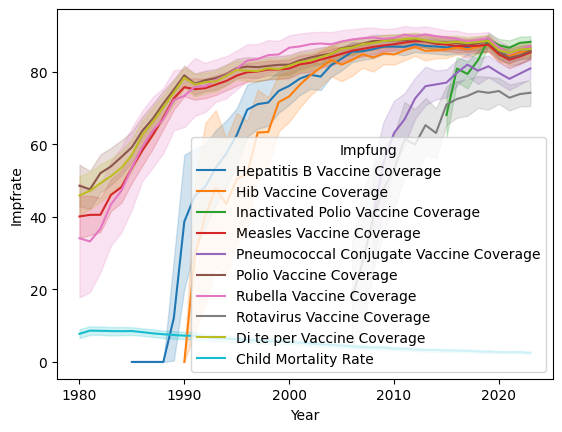

In [109]:
import seaborn as sns
sns.lineplot(data=df_melted, x="Year", y="Impfrate", hue="Impfung")


In [110]:
df_pivot_polio = rename_df.pivot(index='Entity', columns="Year", values= 'Polio Vaccine Coverage')
df_pivot_polio.head()

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Entity,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,3.000000,5.000000,5.000000,16.000000,15.00000,11.000000,25.000000,35.000000,33.000000,...,63.00000,65.000000,66.000000,64.000000,67.00000,63.0000,61.00000,55.000000,60.000000,59.00000
Africa,10.656941,14.858231,17.513079,23.837606,28.816013,36.02056,41.261726,46.605217,50.110027,55.000828,...,73.28532,73.538574,74.914406,75.375946,76.39207,77.7159,74.14831,72.926674,72.966705,76.04714
Albania,92.000000,92.000000,92.000000,92.000000,92.000000,94.00000,94.000000,94.000000,96.000000,96.000000,...,98.00000,99.000000,98.000000,99.000000,99.00000,99.0000,98.00000,98.000000,98.000000,97.00000
Algeria,NaN,31.000000,31.000000,30.000000,30.000000,69.00000,72.000000,79.000000,85.000000,87.000000,...,95.00000,95.000000,91.000000,91.000000,91.00000,88.0000,84.00000,81.000000,77.000000,88.00000
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,97.00000,97.000000,98.000000,99.000000,99.00000,99.0000,99.00000,98.000000,97.000000,98.00000


In [111]:
df_pivot_measles = rename_df.pivot(index='Entity', columns="Year", values= 'Measles Vaccine Coverage')
df_pivot_measles.head()

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Entity,,,,,,,,,,,,,,,,,,,,,
Afghanistan,11.000000,NaN,8.000000,9.000000,14.000000,14.00000,14.000000,31.00000,34.000000,22.000000,...,60.0000,62.00000,64.00000,64.00000,66.00000,57.00000,57.00000,51.0000,56.00000,55.000000
Africa,8.786264,13.580729,16.164875,22.499367,27.352703,37.62123,43.977207,48.10331,53.313152,58.961113,...,71.3308,70.98795,71.45272,72.51367,72.62932,73.30447,71.99248,70.4967,69.96948,70.975334
Albania,90.000000,90.000000,93.000000,96.000000,96.000000,96.00000,96.000000,96.00000,96.000000,96.000000,...,98.0000,97.00000,96.00000,96.00000,94.00000,95.00000,91.00000,87.0000,86.00000,83.000000
Algeria,NaN,NaN,NaN,NaN,NaN,68.00000,67.000000,73.00000,81.000000,82.000000,...,95.0000,95.00000,94.00000,88.00000,80.00000,80.00000,80.00000,79.0000,79.00000,99.000000
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,96.0000,96.00000,97.00000,99.00000,99.00000,99.00000,98.00000,99.0000,98.00000,99.000000


In [112]:
df_pivot_diteper = rename_df.pivot(index='Entity', columns="Year", values= 'Di te per Vaccine Coverage')
df_pivot_diteper.head()

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Entity,,,,,,,,,,,,,,,,,,,,,
Afghanistan,4.000000,3.000000,5.000000,5.000000,16.00000,15.000000,11.00000,25.00000,35.000000,33.00000,...,62.00000,64.00000,66.000000,64.00000,68.00000,65.00000,61.00000,55.00000,58.00000,60.000000
Africa,9.277582,14.022753,15.809792,22.322681,28.28405,36.268597,40.47252,46.72535,50.223446,55.14232,...,73.63328,73.12944,75.721985,76.03318,77.16519,78.16262,75.56682,74.68514,74.55958,75.851456
Albania,94.000000,94.000000,95.000000,95.000000,95.00000,96.000000,96.00000,96.00000,96.000000,94.00000,...,99.00000,99.00000,99.000000,99.00000,99.00000,99.00000,98.00000,98.00000,97.00000,97.000000
Algeria,NaN,NaN,NaN,NaN,NaN,69.000000,73.00000,79.00000,85.000000,87.00000,...,95.00000,95.00000,91.000000,91.00000,91.00000,88.00000,84.00000,81.00000,77.00000,92.000000
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,97.00000,97.00000,98.000000,99.00000,99.00000,99.00000,99.00000,99.00000,98.00000,98.000000


In [113]:
df_pivot_mort = rename_df.pivot(index='Entity', columns="Year", values= 'Child Mortality Rate')
df_pivot_mort.head()

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Entity,,,,,,,,,,,,,,,,,,,,,
Afghanistan,24.57,23.94,27.99,27.44,30.91,30.09,25.31,24.72,21.84,18.71,...,7.51,7.24,7.00,6.76,6.54,6.33,6.13,5.93,5.74,5.55
Africa,18.78,18.30,17.89,18.27,17.86,17.45,16.98,16.18,16.24,15.64,...,7.68,7.49,7.31,7.17,6.83,6.66,6.43,6.27,6.22,5.91
Albania,8.12,7.49,6.90,6.37,5.90,5.48,5.11,4.79,4.51,4.28,...,0.99,0.96,0.94,0.93,0.93,0.94,0.94,0.95,0.94,0.94
Algeria,NaN,14.03,12.31,10.52,8.91,7.61,6.63,5.96,5.55,5.30,...,2.54,2.49,2.45,2.40,2.37,2.33,2.29,2.26,2.23,2.20
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.37,0.35,0.34,0.32,0.31,0.30,0.29,0.28,0.27,0.26


## 3. Statistik der Roh-Daten (Analyse im Long-Format)

Über die einzelnen Spalten kann folgendes ausgesagt werden:

- Die Spalte Länder enthält 205 verschieden Länder.
- Die Spalte Codes enthält 196 verschiedene Codes.
- Es sind Daten zwischen 1980 and 2024 vorhanden. 
- Ab dem Jahr 2011 sind die Daten komplett.
- Die Impfraten bewegen sich zwischen 32.32% und 98.94%.
- Monaco ist das Land mit der durchschnittlich höchsten Impfrate bei Polio.
- Chad ist das Land mit der durchschnittlich tiefsten Impfrate bei Polio.
- Grenada liegt bei der durchschnittlichen Impfrate von Polio an nächsten beim Median.


In [114]:
print(rename_df.dtypes)


Entity                                      object
Code_x                                      object
Year                                         int64
Hepatitis B Vaccine Coverage               float64
Hib Vaccine Coverage                       float64
Inactivated Polio Vaccine Coverage         float64
Measles Vaccine Coverage                   float64
Pneumococcal Conjugate Vaccine Coverage    float64
Polio Vaccine Coverage                     float64
Rubella Vaccine Coverage                   float64
Rotavirus Vaccine Coverage                 float64
Di te per Vaccine Coverage                 float64
Code_y                                      object
Child Mortality Rate                       float64
dtype: object


### 3.1 Analyse Länder

In [115]:
print('Anzahl verschiedener Länder: ', len(rename_df['Entity'].unique()))

Anzahl verschiedener Länder:  205


In [116]:
# Anzahl Datenpunkte pro Land
rename_df['Entity'].value_counts()

Entity
Afghanistan            44
Africa                 44
Albania                44
Argentina              44
Antigua and Barbuda    44
                       ..
Sierra Leone           25
Liberia                25
East Timor             22
Montenegro             18
South Sudan            13
Name: count, Length: 205, dtype: int64

<Axes: title={'center': 'Anzahl Datenpunkte pro Gebiet'}, xlabel='Entity', ylabel='Anzahl Datenpunkte'>

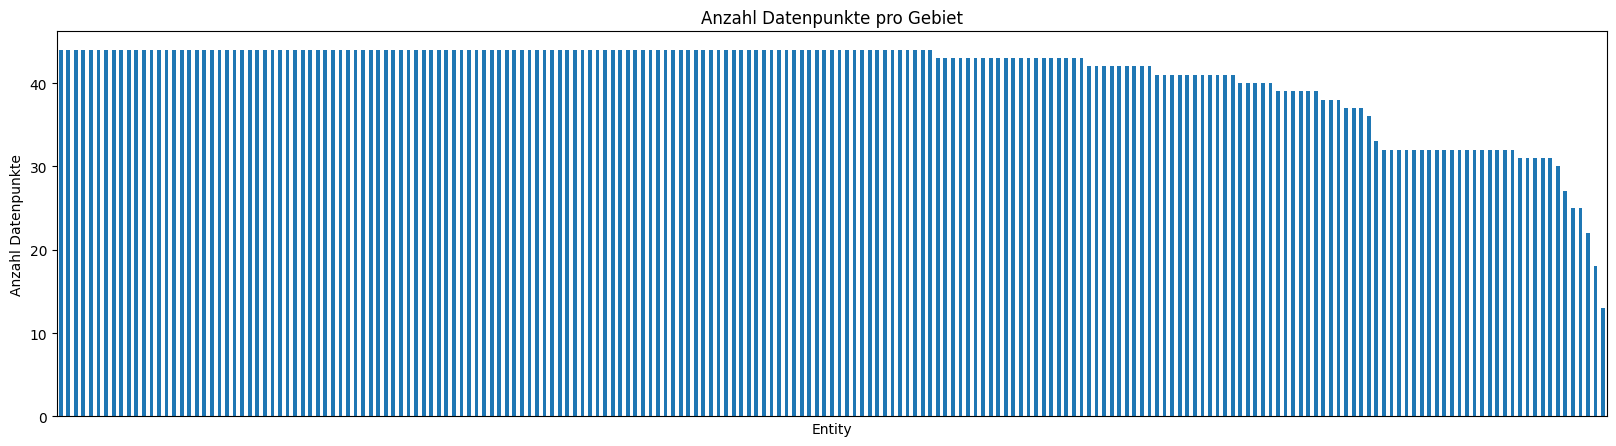

In [117]:
rename_df["Entity"].value_counts().plot(kind='bar', 
                                 xticks=[],
                                 ylabel='Anzahl Datenpunkte',
                                 title='Anzahl Datenpunkte pro Gebiet',
                                 figsize=(20, 5))

In [118]:
#Mittelwerte
mittelwerte = df_pivot_polio.mean(axis=1)
print(mittelwerte)




Entity
Afghanistan    40.860465
Africa         58.748267
Albania        96.454545
Algeria        82.488372
Andorra        96.962963
                 ...    
Vietnam        82.463415
World          71.159091
Yemen          52.318182
Zambia         82.048780
Zimbabwe       80.302326
Length: 205, dtype: float64


In [119]:
Entity_max = mittelwerte.idxmax()
Entity_min = mittelwerte.idxmin()

print("Land mit höchster durchschnittlicher Impfrate:", Entity_max)
print("Land mit tiefster durchschnittlicher Impfrate:", Entity_min)

medianwert = mittelwerte.median()
print("Medianwert:", medianwert)

# Differenz zum Median
abweichung = (mittelwerte - medianwert).abs()

# Land mit geringster Abweichung vom Median
land_median = abweichung.idxmin()

print("Land nahe am Medianwert:", land_median)



Land mit höchster durchschnittlicher Impfrate: Monaco
Land mit tiefster durchschnittlicher Impfrate: Chad
Medianwert: 85.25
Land nahe am Medianwert: Grenada


In [120]:
# Rangliste: beste Impfrate oben, schlechteste unten
rangliste = mittelwerte.sort_values(ascending=False)

anzahl = len(rangliste)
print(rangliste.to_string())



Entity
Monaco                              98.944444
Hungary                             98.863636
Sweden                              98.159091
Slovakia                            97.900000
Czechia                             97.096774
Palestine                           97.096774
Cuba                                97.000000
Andorra                             96.962963
Albania                             96.454545
Belgium                             96.431818
Turkmenistan                        96.343750
Netherlands                         96.318182
Denmark                             96.000000
Luxembourg                          96.000000
Saint Kitts and Nevis               96.000000
Brunei                              95.954545
Iceland                             95.931818
Japan                               95.904762
Uzbekistan                          95.843750
Greece                              95.772727
Belarus                             95.750000
Switzerland                

Die Niederlande ist ein Land auf dem oberen Teil der Liste mit ca. 18 Mio. Einwohnern.

In [121]:
# Rangliste: beste Impfrate unten, schlechteste oben
rangliste = mittelwerte.sort_values(ascending=True)

anzahl = len(rangliste)
print(rangliste.to_string())

Entity
Chad                                32.325000
Somalia                             35.571429
Angola                              36.051282
Central African Republic            40.636364
Afghanistan                         40.860465
Nigeria                             42.700000
Niger                               43.790698
Haiti                               44.954545
Guinea                              45.119048
Democratic Republic of Congo        45.750000
Ethiopia                            47.863636
Papua New Guinea                    50.340909
Laos                                51.023256
Yemen                               52.318182
Pakistan                            53.500000
Equatorial Guinea                   54.384615
Mauritania                          54.441860
Low-income countries                54.681818
Mali                                56.051282
Madagascar                          57.476190
Djibouti                            58.261905
Cameroon                   

Der Chad ist das Land mit der schlechtesten Polio Impfrate mit ca. 20 Mio. Einwohnern.

In [122]:
import pandas as pd

# mittelwerte: Series mit Index = Land (Entity), Wert = durchschnittliche Impfrate des Landes

# 1. Median der durchschnittlichen Impfraten (allgemeiner Median)
medianwert = mittelwerte.median()
print("Median der allgemeinen durchschnittlichen Impfrate:", medianwert)

# 2. Abweichung jedes Landes von diesem Median (Betrag)
abweichung = (mittelwerte - medianwert).abs()

# 3. 20 Länder mit der kleinsten Abweichung (also am nächsten am Median)
nahe_20 = abweichung.nsmallest(20)

# 4. Schön als Tabelle mit Land, Impfrate und Abweichung
tabelle_nahe_20 = pd.DataFrame({
    "Land": nahe_20.index,
    "durchschnittliche_Impfrate": mittelwerte.loc[nahe_20.index],
    "Abweichung_zum_Median": nahe_20.values
}).sort_values("Abweichung_zum_Median")

print(tabelle_nahe_20.to_string(index=False))


Median der allgemeinen durchschnittlichen Impfrate: 85.25
                Land  durchschnittliche_Impfrate  Abweichung_zum_Median
             Grenada                   85.250000               0.000000
 Trinidad and Tobago                   85.295455               0.045455
             Georgia                   85.468750               0.218750
              Tuvalu                   85.522727               0.272727
       North America                   85.548388               0.298388
              Guyana                   84.818182               0.431818
             Jamaica                   85.795455               0.545455
            Portugal                   84.659091               0.590909
United Arab Emirates                   85.954545               0.704545
            Honduras                   84.454545               0.795455
             Bahamas                   86.068182               0.818182
              Belize                   84.340909               0.909091
      

Australien ist ein Land, dass nahe am Median liegt und mit ca. 26 Mio. Einwohnern.

In [123]:
# Alle Spalten mit Impfquoten automatisch auswählen
impf_cols = [col for col in rename_df.columns if "Coverage" in col]

# Mittelwert aller Impfungen pro Jahr und Land
rename_df["Impfungen Durchschnitt"] = rename_df[impf_cols].mean(axis=1)


In [124]:
# Länder gezielt filtern
laender = ['Netherlands', 'Chad', 'Australia']
monaco = ["Monaco"]
df_filtered = rename_df[rename_df['Entity'].isin(laender)]

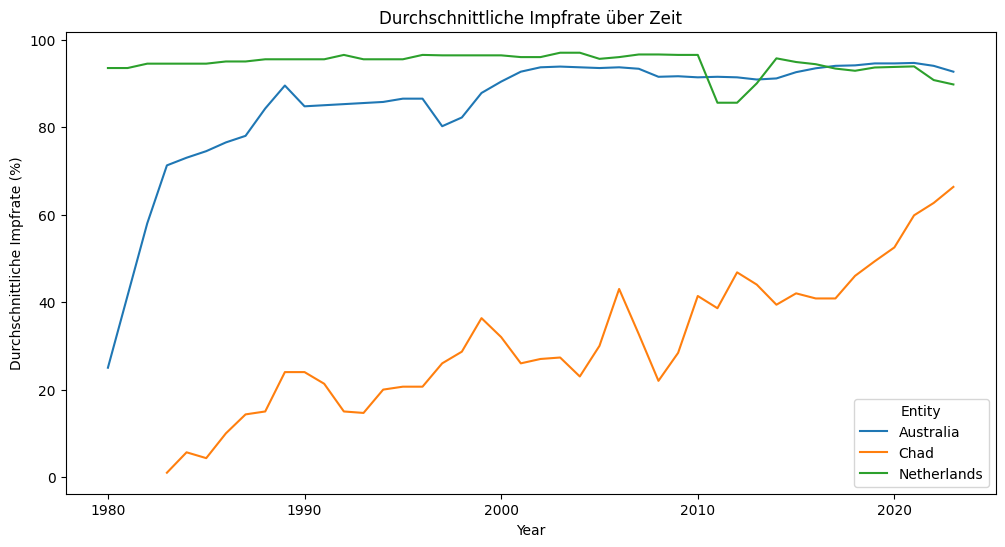

In [125]:
!pip install seaborn
import seaborn as sns

df_avg = rename_df[rename_df['Entity'].isin(laender)]

plt.figure(figsize=(12,6))
sns.lineplot(data=df_avg, x="Year", y="Impfungen Durchschnitt", hue="Entity")
plt.title("Durchschnittliche Impfrate über Zeit")
plt.ylabel("Durchschnittliche Impfrate (%)")
plt.show()

### 3.2 Analyse Codes

In [126]:
print('Anzahl verschiedener Codes: ', len(rename_df['Code_x'].unique()))

Anzahl verschiedener Codes:  196


In [127]:
# Anzahl Datenpunkte pro Land
rename_df['Code_x'].value_counts()

Code_x
AFG    44
ALB    44
ARG    44
DEU    44
ATG    44
       ..
SLE    25
LBR    25
TLS    22
MNE    18
SSD    13
Name: count, Length: 195, dtype: int64

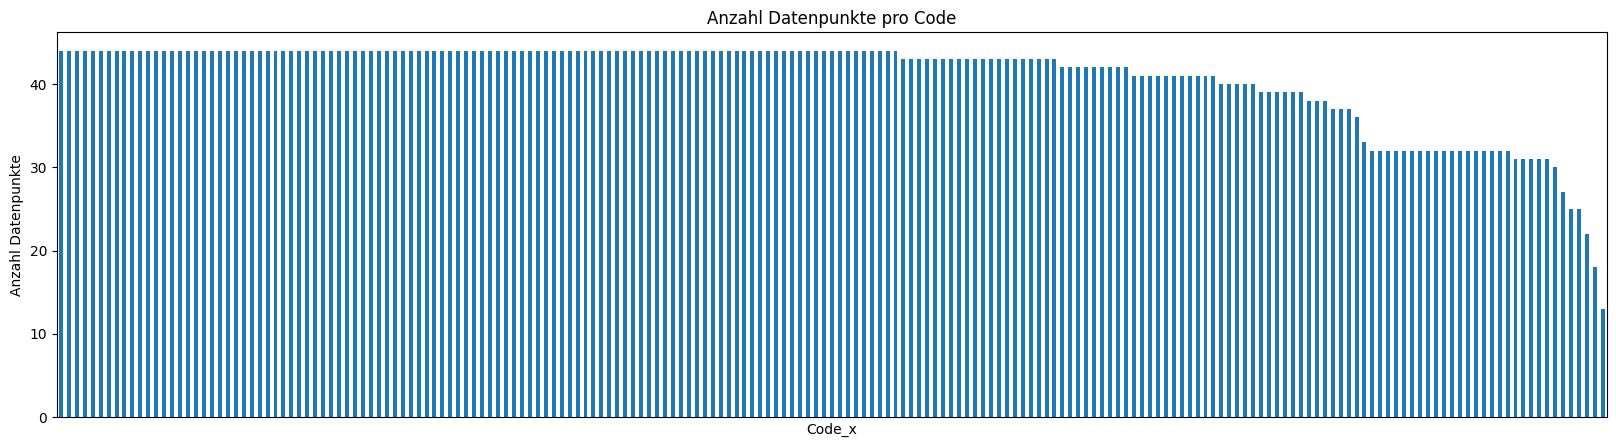

In [128]:
rename_df['Code_x'].value_counts().plot(kind='bar',xticks=[], ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Code', figsize=(20,5));

### 3.3 Analyse Jahr

In [129]:
print('Anzahl verschiedener Jahre: ', len(rename_df['Year'].unique()))

Anzahl verschiedener Jahre:  44


In [130]:
# Anzahl Datenpunkte pro Jahr
rename_df['Year'].value_counts().sort_index()

Year
1980    116
1981    136
1982    145
1983    156
1984    161
1985    167
1986    170
1987    173
1988    174
1989    174
1990    174
1991    175
1992    193
1993    198
1994    199
1995    199
1996    199
1997    200
1998    200
1999    202
2000    202
2001    202
2002    203
2003    203
2004    203
2005    203
2006    204
2007    204
2008    204
2009    204
2010    204
2011    205
2012    205
2013    205
2014    205
2015    205
2016    205
2017    205
2018    205
2019    205
2020    205
2021    205
2022    205
2023    205
Name: count, dtype: int64

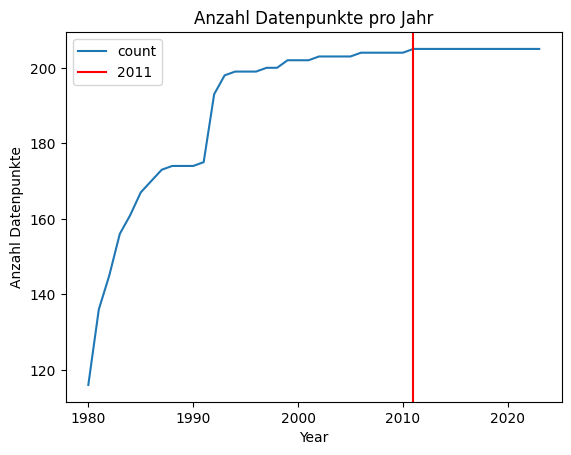

In [131]:
# Jahre mit maximaler Anzahl Datenpunkte (257)
g = rename_df['Year'].value_counts().sort_index().plot(ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Jahr');
g.axvline(x=2011, color='red',label='2011') # rote Linie bei 1950 - ab hier sind alle Jahre enthalten
g.legend()  # Legende anzeigen

### 3.4 Analyse Durchimpfungsrate

In [132]:
rename_df.describe()

,Year,Hepatitis B Vaccine Coverage,Hib Vaccine Coverage,Inactivated Polio Vaccine Coverage,Measles Vaccine Coverage,Pneumococcal Conjugate Vaccine Coverage,Polio Vaccine Coverage,Rubella Vaccine Coverage,Rotavirus Vaccine Coverage,Di te per Vaccine Coverage,Child Mortality Rate,Impfungen Durchschnitt
count,8412.000000,4929.000000,4111.000000,1728.000000,8261.000000,1875.000000,8388.000000,4714.000000,1341.000000,8384.000000,8412.000000,8412.000000
mean,2002.638968,82.059012,83.069218,83.984932,78.609822,77.051267,80.180549,84.502788,69.246996,79.772187,5.149359,77.178608
std,12.308061,21.579231,20.967083,20.513621,21.565537,23.758945,21.746525,22.007045,26.716173,21.799680,5.590848,21.829849
min,1980.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.140000,1.000000
25%,1992.000000,77.000000,78.417250,77.000000,68.000000,68.000000,72.000000,83.000000,55.000000,71.988934,1.217500,66.500000
50%,2003.000000,91.000000,91.000000,93.000000,87.000000,86.000000,89.000000,93.000000,79.000000,88.000000,2.810000,85.000000
75%,2013.000000,96.000000,96.000000,98.000000,95.000000,94.000000,96.000000,97.000000,90.000000,96.000000,7.280000,94.000000
max,2023.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,47.890000,99.000000


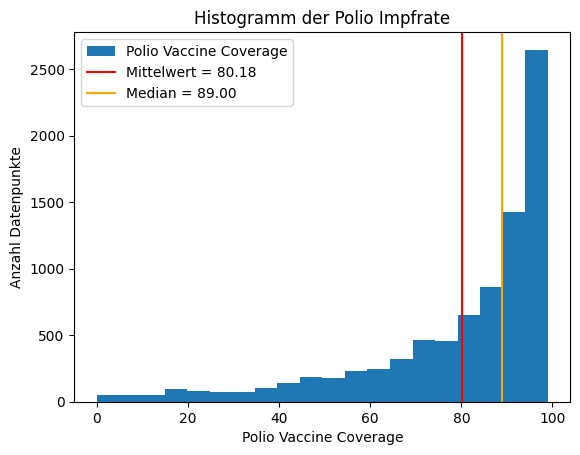

In [133]:
g = rename_df['Polio Vaccine Coverage'].plot(kind='hist', bins=20, title='Histogramm der Polio Impfrate', 
                           xlabel='Polio Vaccine Coverage', ylabel='Anzahl Datenpunkte')
mean = rename_df['Polio Vaccine Coverage'].mean()
g.axvline(x=rename_df['Polio Vaccine Coverage'].mean(), color='red',label=f'Mittelwert = {mean:.2f}')  # rote Linie bei Mittelwert

median = rename_df['Polio Vaccine Coverage'].median()
g.axvline(x=rename_df['Polio Vaccine Coverage'].median(), color='orange',label=  f'Median = {median:.2f}')  # orange Linie bei Median

g.legend()

### 3.5 Analyse Polio Impfung

In [134]:
print('Mittelwert:',rename_df['Polio Vaccine Coverage'].mean())
print('Median:',rename_df['Polio Vaccine Coverage'].median())
print('Standardabweichung:',rename_df['Polio Vaccine Coverage'].std())
print('5% Perzentil:',rename_df['Polio Vaccine Coverage'].quantile(0.05))
print('99.9% Perzentil:',rename_df['Polio Vaccine Coverage'].quantile(0.999))


Mittelwert: 80.18054893921077
Median: 89.0
Standardabweichung: 21.74652519363371
5% Perzentil: 30.0
99.9% Perzentil: 99.0


In [135]:
rename_df.sort_values(by='Polio Vaccine Coverage', ascending=False).head(10)

,Entity,Code_x,Year,Hepatitis B Vaccine Coverage,Hib Vaccine Coverage,Inactivated Polio Vaccine Coverage,Measles Vaccine Coverage,Pneumococcal Conjugate Vaccine Coverage,Polio Vaccine Coverage,Rubella Vaccine Coverage,Rotavirus Vaccine Coverage,Di te per Vaccine Coverage,Code_y,Child Mortality Rate,Impfungen Durchschnitt
6355,Saint Lucia,LCA,2014,99.0,99.0,NaN,99.0,NaN,99.0,99.0,NaN,99.0,LCA,1.75,99.00
6327,Saint Kitts and Nevis,KNA,1986,NaN,NaN,NaN,96.0,NaN,99.0,NaN,NaN,99.0,KNA,3.56,98.00
6354,Saint Lucia,LCA,2013,99.0,99.0,NaN,99.0,NaN,99.0,99.0,NaN,99.0,LCA,1.77,99.00
6330,Saint Kitts and Nevis,KNA,1989,NaN,NaN,NaN,90.0,NaN,99.0,90.0,NaN,99.0,KNA,3.12,94.50
6331,Saint Kitts and Nevis,KNA,1990,NaN,NaN,NaN,99.0,NaN,99.0,99.0,NaN,99.0,KNA,3.03,99.00
6332,Saint Kitts and Nevis,KNA,1991,NaN,NaN,NaN,99.0,NaN,99.0,99.0,NaN,99.0,KNA,2.96,99.00
6333,Saint Kitts and Nevis,KNA,1992,NaN,NaN,NaN,99.0,NaN,99.0,99.0,NaN,99.0,KNA,2.90,99.00
1538,China,CHN,2009,99.0,NaN,NaN,99.0,NaN,99.0,NaN,NaN,99.0,CHN,1.71,99.00
1537,China,CHN,2008,95.0,NaN,NaN,97.0,NaN,99.0,NaN,NaN,97.0,CHN,1.85,97.00
1367,Cape Verde,CPV,2010,98.0,NaN,NaN,97.0,NaN,99.0,NaN,NaN,99.0,CPV,2.67,98.25


<Axes: ylabel='Frequency'>

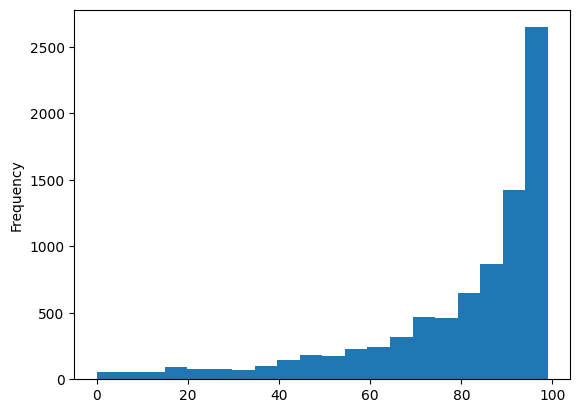

In [136]:
rename_df['Polio Vaccine Coverage'].plot(kind='hist', bins=20)

### 3.6 Analyse Kindersterblichkeit

In [137]:
print('Mittelwert:',rename_df['Child Mortality Rate'].mean())
print('Median:',rename_df['Child Mortality Rate'].median())
print('Standardabweichung:',rename_df['Child Mortality Rate'].std())
print('5% Perzentil:',rename_df['Child Mortality Rate'].quantile(0.05))
print('99.9% Perzentil:',rename_df['Child Mortality Rate'].quantile(0.999))


Mittelwert: 5.1493592486923445
Median: 2.81
Standardabweichung: 5.590847857892816
5% Perzentil: 0.4
99.9% Perzentil: 33.864920000000495


In [138]:
rename_df.describe()

,Year,Hepatitis B Vaccine Coverage,Hib Vaccine Coverage,Inactivated Polio Vaccine Coverage,Measles Vaccine Coverage,Pneumococcal Conjugate Vaccine Coverage,Polio Vaccine Coverage,Rubella Vaccine Coverage,Rotavirus Vaccine Coverage,Di te per Vaccine Coverage,Child Mortality Rate,Impfungen Durchschnitt
count,8412.000000,4929.000000,4111.000000,1728.000000,8261.000000,1875.000000,8388.000000,4714.000000,1341.000000,8384.000000,8412.000000,8412.000000
mean,2002.638968,82.059012,83.069218,83.984932,78.609822,77.051267,80.180549,84.502788,69.246996,79.772187,5.149359,77.178608
std,12.308061,21.579231,20.967083,20.513621,21.565537,23.758945,21.746525,22.007045,26.716173,21.799680,5.590848,21.829849
min,1980.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.140000,1.000000
25%,1992.000000,77.000000,78.417250,77.000000,68.000000,68.000000,72.000000,83.000000,55.000000,71.988934,1.217500,66.500000
50%,2003.000000,91.000000,91.000000,93.000000,87.000000,86.000000,89.000000,93.000000,79.000000,88.000000,2.810000,85.000000
75%,2013.000000,96.000000,96.000000,98.000000,95.000000,94.000000,96.000000,97.000000,90.000000,96.000000,7.280000,94.000000
max,2023.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,47.890000,99.000000


In [139]:
rename_df.sort_values(by='Child Mortality Rate', ascending=False).head(10)

,Entity,Code_x,Year,Hepatitis B Vaccine Coverage,Hib Vaccine Coverage,Inactivated Polio Vaccine Coverage,Measles Vaccine Coverage,Pneumococcal Conjugate Vaccine Coverage,Polio Vaccine Coverage,Rubella Vaccine Coverage,Rotavirus Vaccine Coverage,Di te per Vaccine Coverage,Code_y,Child Mortality Rate,Impfungen Durchschnitt
1400,Central African Republic,CAF,2009,42.0,42.0,NaN,56.0,NaN,45.0,NaN,NaN,42.0,CAF,47.89,45.400000
6910,Somalia,SOM,1992,NaN,NaN,NaN,32.0,NaN,20.0,NaN,NaN,21.0,SOM,45.60,24.333333
6909,Somalia,SOM,1991,NaN,NaN,NaN,30.0,NaN,18.0,NaN,NaN,20.0,SOM,44.29,22.666667
6291,Rwanda,RWA,1994,NaN,NaN,NaN,25.0,NaN,23.0,NaN,NaN,23.0,RWA,38.90,23.666667
1413,Central African Republic,CAF,2022,33.0,33.0,33.0,32.0,32.0,35.0,NaN,NaN,33.0,CAF,38.74,33.000000
6929,Somalia,SOM,2011,NaN,NaN,NaN,46.0,NaN,49.0,NaN,NaN,41.0,SOM,35.85,45.333333
5364,Niger,NER,1987,NaN,NaN,NaN,27.0,NaN,7.0,NaN,NaN,7.0,NER,34.09,13.666667
5363,Niger,NER,1986,NaN,NaN,NaN,27.0,NaN,5.0,NaN,NaN,5.0,NER,33.99,12.333333
5365,Niger,NER,1988,NaN,NaN,NaN,24.0,NaN,9.0,NaN,NaN,9.0,NER,33.98,14.000000
5362,Niger,NER,1985,NaN,NaN,NaN,27.0,NaN,4.0,NaN,NaN,4.0,NER,33.70,11.666667


<Axes: ylabel='Frequency'>

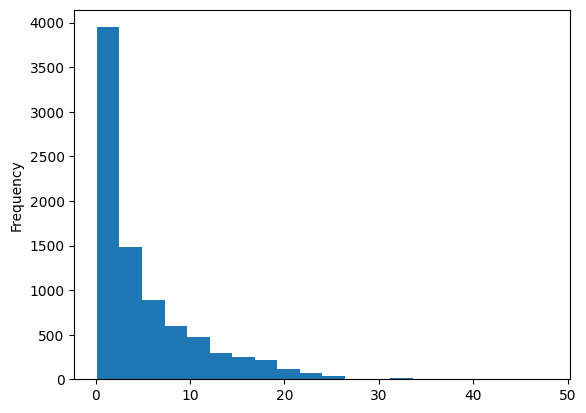

In [140]:
rename_df['Child Mortality Rate'].plot(kind='hist', bins=20)

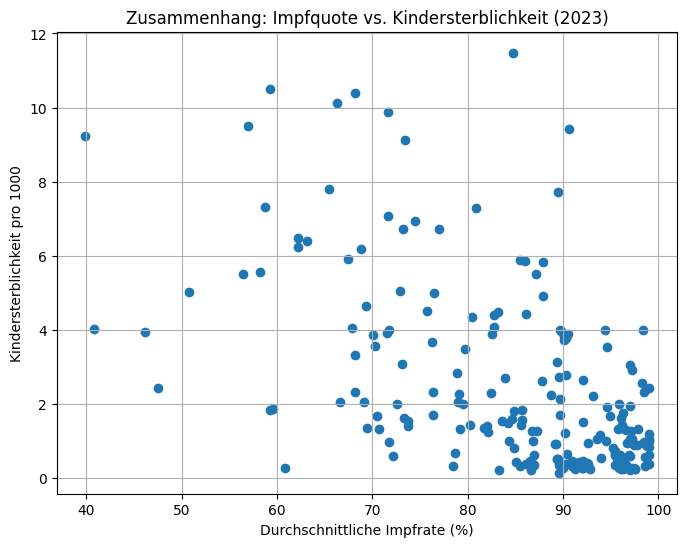

In [141]:
# Beispiel: Scatterplot für ein bestimmtes Jahr
df_corr = rename_df[rename_df["Year"] == 2023]
plt.figure(figsize=(8,6))
plt.scatter(df_corr["Impfungen Durchschnitt"], df_corr["Child Mortality Rate"])
plt.xlabel("Durchschnittliche Impfrate (%)")
plt.ylabel("Kindersterblichkeit pro 1000")
plt.title("Zusammenhang: Impfquote vs. Kindersterblichkeit (2023)")
plt.grid(True)
plt.show()


In [142]:
# Pearson-Korrelation zwischen Impfquote und Kindersterblichkeit
korrelation = df_corr["Impfungen Durchschnitt"].corr(df_corr["Child Mortality Rate"])
print(f"Korrelationskoeffizient (2023): {korrelation:.3f}")


Korrelationskoeffizient (2023): -0.543


| Wert          | Bedeutung                           |
| ------------- | ----------------------------------- |
| -0.8 bis -1.0 | sehr starker negativer Zusammenhang |
| -0.5 bis -0.8 | deutlicher negativer Zusammenhang   |
| -0.3 bis -0.5 | schwacher negativer Zusammenhang    |
| 0 bis -0.3    | kaum Zusammenhang                   |

Negativer Zusammenhang bedeutet in unserem Beispiel, dass wenn die Impfrate steigt, die Kindersterblichkeit sinkt.
Ein positiver Zusammenhang würde bedeuten, dass beide Werte steigen, respektive sinken würden.

In [143]:
def berechne_korrelationsverlauf(df, impf_spalte, sterbe_spalte, min_laender=10):
    """
    Berechnet den jährlichen Korrelationsverlauf zwischen Impfquote und Kindersterblichkeit.

    Parameter:
    - df: DataFrame mit den Daten
    - impf_spalte: Spaltenname für Impfquote
    - sterbe_spalte: Spaltenname für Kindersterblichkeit
    - min_laender: minimale Anzahl Länder pro Jahr (Standard: 10)

    Rückgabe:
    - DataFrame mit Jahr und Korrelationswert
    """
    jahre = []
    korrelationen = []

    for jahr in sorted(df["Year"].unique()):
        df_jahr = df[df["Year"] == jahr]
        if len(df_jahr) >= min_laender:
            r = df_jahr[impf_spalte].corr(df_jahr[sterbe_spalte])
            jahre.append(jahr)
            korrelationen.append(r)

    return pd.DataFrame({"Jahr": jahre, "Korrelation": korrelationen})


In [144]:
df_korr = berechne_korrelationsverlauf(rename_df, "Impfungen Durchschnitt", "Child Mortality Rate")


In [145]:
print("Statistische Auswertung der Korrelation Impfquote vs. Kindersterblichkeit:\n")

print(f"Anzahl Jahre: {len(df_korr)}")
print(f"Stärkste negative Korrelation: {df_korr['Korrelation'].min():.3f} im Jahr {df_korr.loc[df_korr['Korrelation'].idxmin(), 'Jahr']}")
print(f"Schwächste (nahe 0) Korrelation: {df_korr['Korrelation'].max():.3f} im Jahr {df_korr.loc[df_korr['Korrelation'].idxmax(), 'Jahr']}")
print(f"Durchschnittliche Korrelation: {df_korr['Korrelation'].mean():.3f}")
print(f"Standardabweichung: {df_korr['Korrelation'].std():.3f}")


Statistische Auswertung der Korrelation Impfquote vs. Kindersterblichkeit:

Anzahl Jahre: 44
Stärkste negative Korrelation: -0.765 im Jahr 2001
Schwächste (nahe 0) Korrelation: -0.543 im Jahr 2023
Durchschnittliche Korrelation: -0.670
Standardabweichung: 0.058


### 3.7 Vergleich Impfungen Total

(np.float64(-1.0999999426447276),
 np.float64(1.0999996315171146),
 np.float64(-1.0999995437581662),
 np.float64(1.0999999782741985))

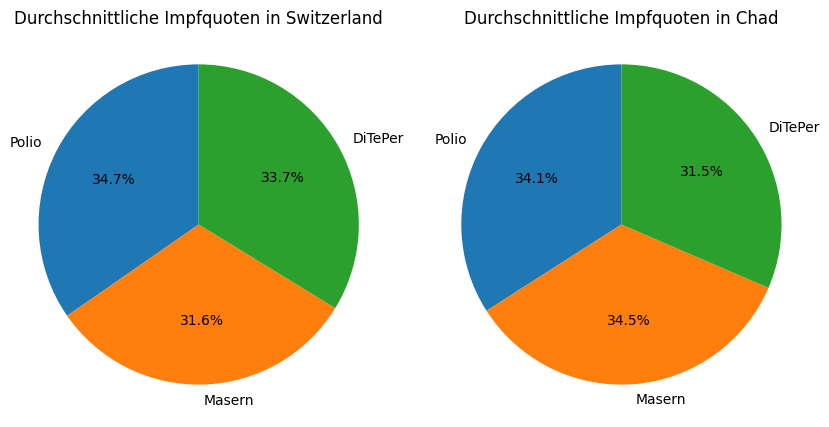

In [146]:
import pandas as pd
import matplotlib.pyplot as plt

# Länder auswählen
country_schweiz = "Switzerland"
country_chad = "Chad"

def get_means_for_country(country):
    polio_mean    = df_pivot_polio.loc[country].mean()
    measles_mean  = df_pivot_measles.loc[country].mean()
    diteper_mean  = df_pivot_diteper.loc[country].mean()
    return pd.Series(
        [polio_mean, measles_mean, diteper_mean],
        index=["Polio", "Masern", "DiTePer"]
    )

werte1 = get_means_for_country(country_schweiz)
werte2 = get_means_for_country(country_chad)

# Zwei Subplots nebeneinander
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Land 1
axes[0].pie(
    werte1,
    labels=werte1.index,
    autopct="%1.1f%%",
    startangle=90
)
axes[0].set_title(f"Durchschnittliche Impfquoten in {country_schweiz}")
axes[0].axis("equal")  # runder Kreis

# Land 2
axes[1].pie(
    werte2,
    labels=werte2.index,
    autopct="%1.1f%%",
    startangle=90
)
axes[1].set_title(f"Durchschnittliche Impfquoten in {country_chad}")
axes[1].axis("equal")  # runder Kreis


### 3.8 Sinkende Impfrate in Monaco

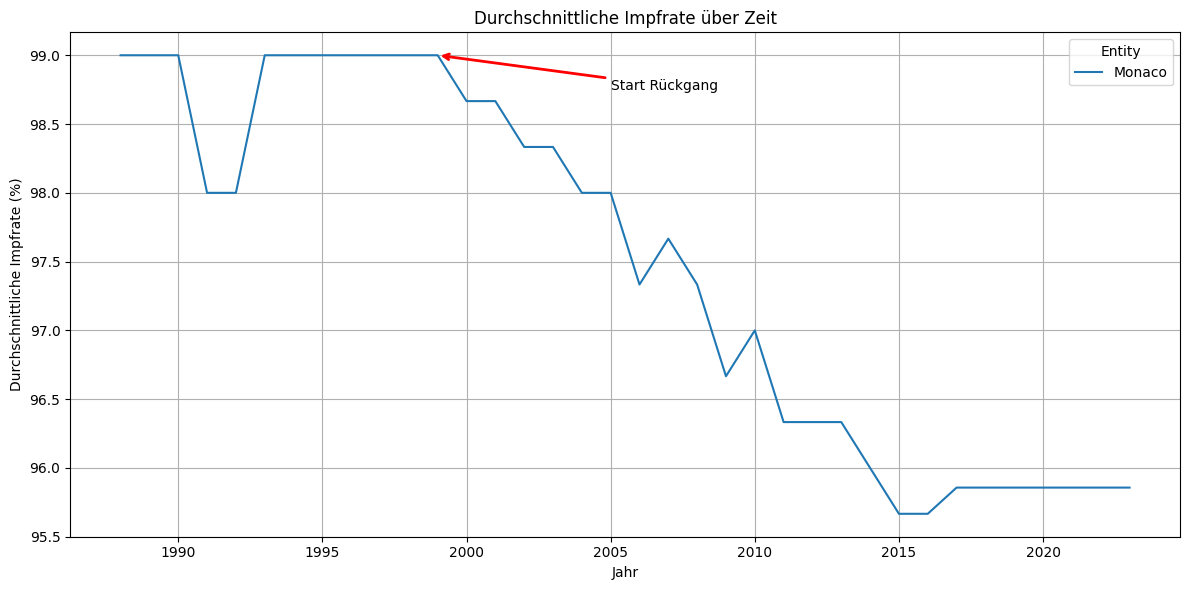

In [157]:
df_avg = rename_df[rename_df['Entity'].isin(monaco)]
plt.figure(figsize=(12,6))
sns.lineplot(data=df_avg, x="Year", y="Impfungen Durchschnitt", hue="Entity")
plt.title("Durchschnittliche Impfrate über Zeit")
plt.xlabel("Jahr")
plt.ylabel("Durchschnittliche Impfrate (%)")
plt.grid(True)

# ⬇️ Pfeil auf Jahr 1998 bei 99 %
plt.annotate(
    "Start Rückgang",
    xy=(1999, 99),          # Zielpunkt: (x = Jahr, y = Wert)
    xytext=(2005, 98.75),    # Position des Textes (ein wenig rechts/oben)
    arrowprops=dict(
        arrowstyle="->",
        color="red",
        linewidth=2,
    ),
)

plt.tight_layout()
plt.show()



## 4. Analyse

### Vorgehen

### Beobachtungen
**Beobachtungen zur Impfquote über die Zeit**

Die durchschnittlichen Impfquoten sind in den meisten untersuchten Ländern seit den 1990er-Jahren deutlich gestiegen.

- In der **Schweiz** und den **USA** lagen die Quoten bereits früh über 90 % und blieben über die Jahre konstant hoch.
- **Indien** und **Nigeria** zeigen dagegen einen kontinuierlichen Anstieg. Besonders in Nigeria ist der Fortschritt nach dem Jahr 2005 bemerkbar.
- **Brasilien** hatte bereits früh hohe Werte, allerdings mit leichteren Schwankungen.

Diese Entwicklung deutet auf erfolgreiche Impfprogramme in vielen Ländern hin, insbesondere in Ländern mit ursprünglich niedriger Quote.

**Beobachtungen zum Zusammenhang zwischen Impfquote und Kindersterblichkeit**

Die Scatterplot-Analyse für das Jahr 2023 zeigt einen klaren negativen Zusammenhang:

- Länder mit hohen Impfraten haben fast durchgehend eine geringe Kindersterblichkeitsrate.
- Umgekehrt weisen Länder mit niedrigen Impfraten deutlich höhere Sterblichkeitsraten auf.
- Die berechnete Pearson-Korrelation von -0.543 bestätigt diesen starken negativen Zusammenhang.

Dies legt nahe, dass hohe Durchimpfungsraten ein entscheidender Faktor für die Reduktion der Kindersterblichkeit sind.

**Beobachtungen zur Entwicklung des Zusammenhangs über die Jahre**

Die Korrelation zwischen Impfquote und Kindersterblichkeit wird zwischen 1990 und 2023 zunehmend negativer, was bedeutet:

- Der Zusammenhang zwischen diesen beiden Faktoren wird im Zeitverlauf stärker.
- Das könnte darauf hindeuten, dass Impfungen mit der Zeit eine immer größere Rolle in der Senkung der Kindersterblichkeit spielen.
- Nach 2015 flacht die Korrelation etwas ab, was möglicherweise darauf zurückzuführen ist, dass andere Gesundheitsfaktoren (z. B. Hygiene, medizinische Versorgung) ebenfalls entscheidender werden.

Die Entwicklung zeigt insgesamt, wie bedeutend Impfprogramme für die globale Gesundheit sind.


### Interpretation

Die durchgeführten Visualisierungen und Berechnungen zeigen deutliche Muster im Zusammenhang zwischen Impfquoten und Kindersterblichkeit:

Unterschiede im Impfverlauf: Während Länder wie die Niederlande konstant hohe Impfquoten zeigen, konnten Länder wie Australien deutliche Fortschritte machen. Andere Länder wie der Chad hinken weiterhin hinterher. Dies verdeutlicht globale Unterschiede im Zugang zu Impfungen.

Zusammenhang mit Kindersterblichkeit: Es besteht ein moderater negativer Zusammenhang zwischen Impfrate und Kindersterblichkeit. Länder mit hoher Impfrate verzeichnen im Allgemeinen eine niedrigere Kindersterblichkeitsrate. Dies wird durch die berechnete Korrelation von –0.543 im Jahr 2023 bestätigt.

Verlauf über die Zeit: Der negative Zusammenhang hat sich über die letzten Jahrzehnte verstärkt. Die Korrelation ist seit den 1990er-Jahren kontinuierlich gesunken, was auf eine zunehmende Bedeutung von Impfprogrammen für die Senkung der Kindersterblichkeit hinweist.

Insgesamt bestätigen die Ergebnisse, dass hohe Impfraten ein zentraler Faktor für die globale Verbesserung der Kinderüberlebenschancen sind – insbesondere in Regionen mit schwacher medizinischer Infrastruktur.

### Berechnungen

In [148]:
# Impf-Columns automatisch auswählen
impf_cols = [col for col in rename_df.columns if "Coverage" in col]

# Durchschnittliche Impfrate je Zeile (Land & Jahr)
rename_df["Impfungen Durchschnitt"] = rename_df[impf_cols].mean(axis=1)


In [149]:
df_2023 = rename_df[rename_df["Year"] == 2023]
korrelation = df_2023["Impfungen Durchschnitt"].corr(df_2023["Child Mortality Rate"])
print(f"Korrelation 2023: {korrelation:.3f}")


Korrelation 2023: -0.543


In [150]:
jahre = []
korrelationen = []

for jahr in sorted(rename_df["Year"].unique()):
    df_jahr = rename_df[rename_df["Year"] == jahr]
    if len(df_jahr) > 10:
        corr = df_jahr["Impfungen Durchschnitt"].corr(df_jahr["Child Mortality Rate"])
        jahre.append(jahr)
        korrelationen.append(corr)

df_korr = pd.DataFrame({"Jahr": jahre, "Korrelation": korrelationen})


In [151]:
laender = ['Netherlands', 'Chad', 'Australia']
df_plot = rename_df[rename_df['Entity'].isin(laender)]


### Visualisierung

**Entwicklung der Polio-Impfquote über die Zeit (Ländervergleich)**

Die Grafik zeigt die Entwicklung der Polio-Impfquoten in drei sehr unterschiedlichen Ländern:

- **Belgien**: konstant hohe Impfquote über 90 % – bereits früh ein hoher medizinischer Standard.
- **Malawi**: zeigt eine klare Steigerung seit den 1990er-Jahren – Hinweis auf erfolgreiche Impfprogramme.
- **Papua-Neuguinea**: insgesamt niedrigere Impfquoten und weniger Fortschritt – es bestehen Herausforderungen beim Zugang zu Impfungen.

Diese Entwicklungen deuten auf globale Ungleichheiten hin, insbesondere im Gesundheitszugang und in der Umsetzung von Impfprogrammen.


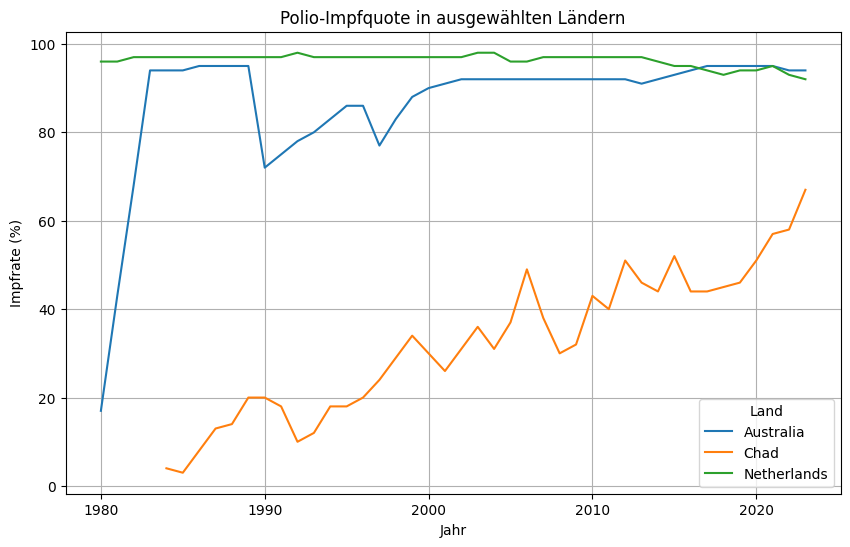

In [152]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df_plot, x="Year", y="Polio Vaccine Coverage", hue="Entity")
plt.title("Polio-Impfquote in ausgewählten Ländern")
plt.xlabel("Jahr")
plt.ylabel("Impfrate (%)")
plt.legend(title="Land")
plt.grid(True)
plt.show()


**Beobachtung zum Zusammenhang zwischen Impfquote und Kindersterblichkeit (2023)**

Der Scatterplot zeigt einen deutlich negativen Zusammenhang:

- Länder mit einer **hohen durchschnittlichen Impfquote** haben fast ausnahmslos eine **geringe Kindersterblichkeit**.
- Länder mit niedriger Impfquote erreichen deutlich **höhere Sterblichkeitsraten pro 1000 Geburten**.
- Die Pearson-Korrelation beträgt –0.543 – ein **moderater negativer Zusammenhang**.

Dies legt nahe, dass Impfraten ein bedeutender Faktor für das Überleben von Kleinkindern sind, insbesondere in Ländern mit begrenzter medizinischer Versorgung.


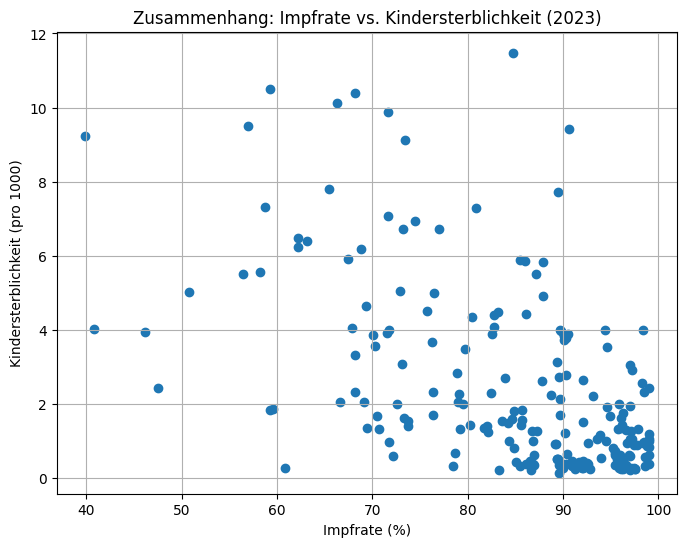

In [153]:
plt.figure(figsize=(8,6))
plt.scatter(df_2023["Impfungen Durchschnitt"], df_2023["Child Mortality Rate"])
plt.title("Zusammenhang: Impfrate vs. Kindersterblichkeit (2023)")
plt.xlabel("Impfrate (%)")
plt.ylabel("Kindersterblichkeit (pro 1000)")
plt.grid(True)
plt.show()


**Entwicklung der Korrelation zwischen Impfquote und Kindersterblichkeit**

Die Korrelationskurve zeigt, dass der **negative Zusammenhang zwischen Impfquote und Kindersterblichkeit** über die Jahre insgesamt **stärker geworden ist**:

- In den 1990er-Jahren war der Zusammenhang noch weniger deutlich.
- Ab ca. 2005 sinkt der Korrelationswert – das bedeutet: Länder mit besseren Impfraten konnten die Kindersterblichkeit stärker senken.
- Nach 2015 stabilisiert sich der Wert etwas – möglicherweise, weil in vielen Ländern weitere Gesundheitsfaktoren (z. B. Hygiene, Ernährung, medizinische Infrastruktur) ebenfalls eine große Rolle spielen.

Die Analyse unterstreicht, wie wichtig flächendeckende Impfprogramme für den Rückgang der globalen Kindersterblichkeit sind.


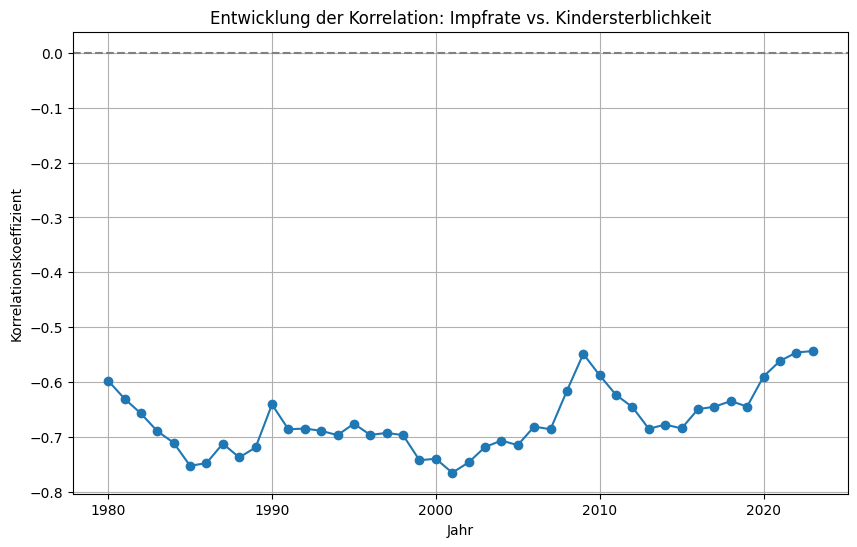

In [154]:
plt.figure(figsize=(10,6))
plt.plot(df_korr["Jahr"], df_korr["Korrelation"], marker='o')
plt.title("Entwicklung der Korrelation: Impfrate vs. Kindersterblichkeit")
plt.xlabel("Jahr")
plt.ylabel("Korrelationskoeffizient")
plt.axhline(0, color='gray', linestyle='--')
plt.grid(True)
plt.show()
